# EB birefringence angle analysis

Load the results of MCMC

In [132]:
import pickle
results = pickle.load(open("../results.pkl","rb"))

Given the number of entries, we generate a large color palette to be used in the different plot

In [136]:
import matplotlib.pyplot as plt
colors = [plt.get_cmap("inferno", len(results))(i) for i in range(len(results))]

## Check acceptance rate & $R-1$ value

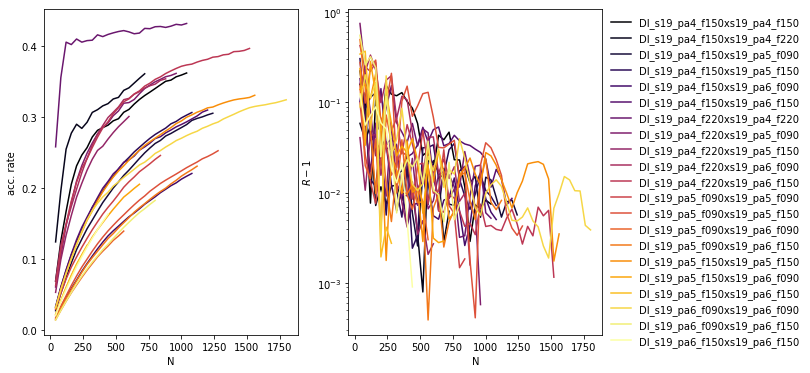

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].set_ylabel("acc. rate")
ax[1].set_ylabel("$R-1$")
for i, (k, v) in enumerate(results.items()):
    v["progress"].plot(x="N", y="acceptance_rate", ax=ax[0], color=colors[i], legend=False)
    v["progress"].plot(x="N", y="Rminus1", ax=ax[1], color=colors[i], legend=False, logy=True)

ax[1].legend(results.keys(), bbox_to_anchor=(1,1));

## $\alpha$ posterior distributions

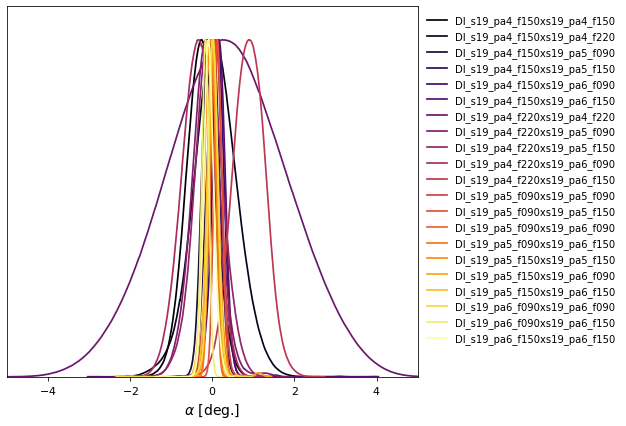

In [157]:
samples = [v["sample"] for k, v in results.items()]
line_args = [{"ls": "-", "color": colors[i]} for i in range(len(samples))]

g = plots.get_single_plotter(ratio=1, width_inch=6)
g.plot_1d(samples, "alpha", line_args=line_args)
plt.xlabel(r"$\alpha$ [deg.]")
plt.legend(results.keys(), bbox_to_anchor=(1, 1));

In [190]:
mean_mcmc = [result["sample"].getMeans()[0] for result in results.values()]
std_mcmc = [np.sqrt(result["sample"].getVars()[0]) for result in results.values()]
std_fisher = [result["std_fisher"] for result in results.values()]
delta = 100 * (1 - np.array(std_mcmc) / np.array(std_fisher))

import pandas as pd

df = pd.DataFrame(
    {
        "mean MCMC": mean_mcmc,
        "std. MCMC": std_mcmc,
        "std. Fisher": std_fisher,
        "$\Delta$ [%]": delta,
    },
    index=results.keys(),
)
df

,mean MCMC,std. MCMC,std. Fisher,$\Delta$ [%]
Dl_s19_pa4_f150xs19_pa4_f150,-0.296817,0.344508,0.369973,6.882880
Dl_s19_pa4_f150xs19_pa4_f220,0.075787,0.531792,0.546477,2.687152
Dl_s19_pa4_f150xs19_pa5_f090,-0.098272,0.150039,0.147747,-1.551473
Dl_s19_pa4_f150xs19_pa5_f150,0.020168,0.205900,0.165875,-24.129798
Dl_s19_pa4_f150xs19_pa6_f090,0.139365,0.151329,0.145971,-3.670995
Dl_s19_pa4_f150xs19_pa6_f150,0.134303,0.191877,0.165737,-15.771825
Dl_s19_pa4_f220xs19_pa4_f220,0.336686,1.443335,1.515563,4.765781
Dl_s19_pa4_f220xs19_pa5_f090,-0.165034,0.360501,0.376465,4.240524
Dl_s19_pa4_f220xs19_pa5_f150,-0.089692,0.353272,0.379234,6.845921
Dl_s19_pa4_f220xs19_pa6_f090,-0.350867,0.390304,0.350882,-11.235234


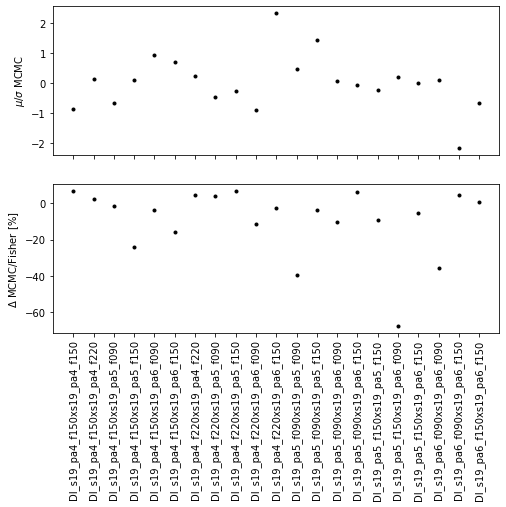

In [205]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].plot(df.index, df["mean MCMC"] / df["std. MCMC"], ".k")
ax[0].set_ylabel(r"$\mu/\sigma$ MCMC")
ax[1].plot(df.index, delta, ".k")
ax[1].set_ylabel(r"$\Delta$ MCMC/Fisher [%]")
plt.xticks(rotation=90);